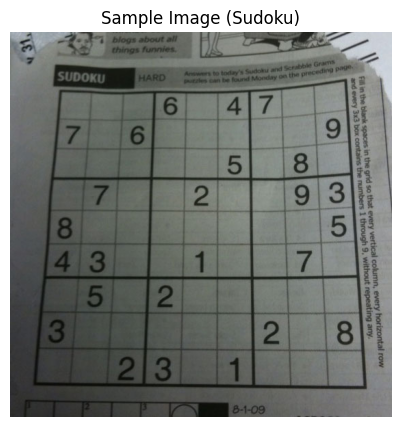

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Download a sample OpenCV image
url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/sudoku.png"
urllib.request.urlretrieve(url, "sudoku.png")

# Load image using OpenCV (BGR format)
img_bgr = cv2.imread("sudoku.png")

# Display image
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title("Sample Image (Sudoku)")
plt.axis('off')
plt.show()


**!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/sudoku.png**
This is a Colab shell command that downloads a sample image from the internet and saves it locally. The downloaded image serves as a fixed input for demonstrating image-processing operations without requiring the user to upload files manually.

**img = cv2.imread("sudoku.png")**
This function reads the downloaded image file from disk and stores it as a NumPy array. By default, OpenCV loads images in BGR (Blue, Green, Red) format, which is different from the RGB format commonly used for visualization.

**cv2.cvtColor(img, cv2.COLOR_BGR2RGB)**
This function converts the image from BGR color space to RGB color space. This conversion is necessary because Matplotlib expects images in RGB format; without this step, the displayed colors would appear incorrect.

**plt.imshow(...)**
This function displays the image stored as a NumPy array. It maps pixel values to colors and renders the image within the notebook output cell

Convert to Grayscale (CV2 + Manual Weighted Method)

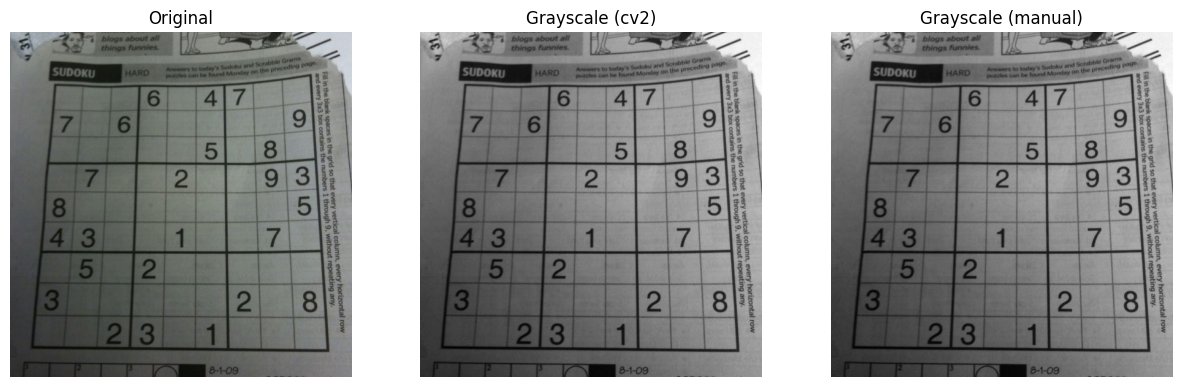

In [ ]:
gray_cv2 = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Manual grayscale using luminance formula
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB).astype(np.float32)
R, G, B = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]
gray_manual = (0.2989*R + 0.5870*G + 0.1140*B).astype(np.uint8)

show([img_bgr, gray_cv2, gray_manual],
     ["Original", "Grayscale (cv2)", "Grayscale (manual)"])


Normalization

Original intensity range: 7.0 → 218.0
Normalized range: 0.02745098 → 0.85490197


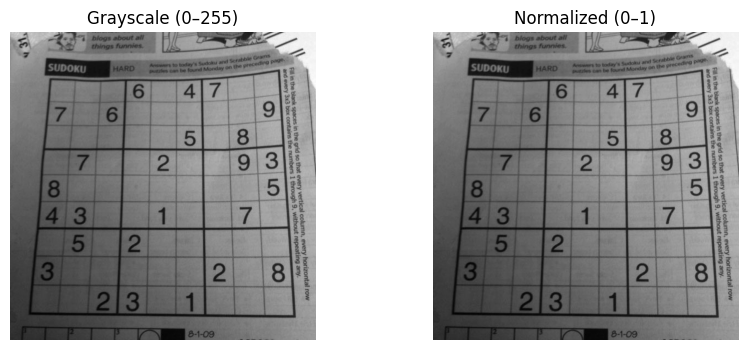

In [ ]:
gray = gray_cv2.astype(np.float32)
gray_norm = gray / 255.0

print("Original intensity range:", gray.min(), "→", gray.max())
print("Normalized range:", gray_norm.min(), "→", gray_norm.max())

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale (0–255)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gray_norm, cmap='gray')
plt.title("Normalized (0–1)")
plt.axis('off')
plt.show()


**gray = gray_cv2.astype(np.float32)**
This line converts the grayscale image from its original integer data type (usually uint8, with values from 0 to 255) into 32-bit floating point numbers. This is important because many mathematical operations—such as division, normalization, and gradient calculations—are more accurate and safer when performed on floating-point values rather than integers.

**gray_norm = gray / 255.0**
This line normalizes the pixel intensities by dividing every pixel value by 255. As a result, all pixel values are scaled from the range [0, 255] to [0, 1]. Normalization makes image values consistent, improves numerical stability, and is especially important for machine-learning models and convolution operations.

Simple Thresholding

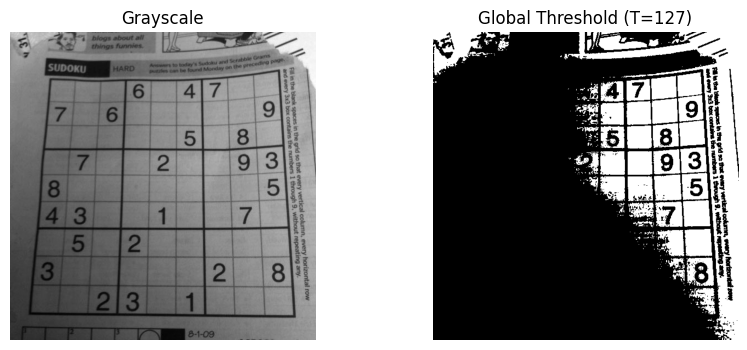

In [ ]:
_, thr_global = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(thr_global, cmap="gray")
plt.title("Global Threshold (T=127)")
plt.axis("off")
plt.show()



**_, thresh_simple = cv2.threshold(gray_cv2, 127, 255, cv2.THRESH_BINARY)**
This line applies simple (global) thresholding to the grayscale image. The function cv2.threshold compares every pixel value in gray_cv2 with a fixed threshold value of 127. If a pixel’s intensity is greater than 127, it is set to 255 (white); otherwise, it is set to 0 (black). The function returns two values: the first is the threshold value used (which we do not need here, so it is ignored using _), and the second is the resulting binary image, stored in thresh_simple



Blurring

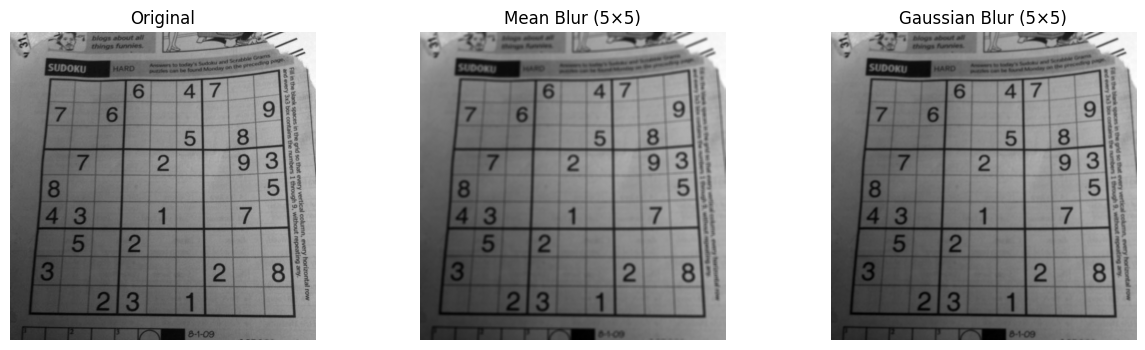

In [ ]:
blur_mean = cv2.blur(gray, (5,5))
blur_gauss = cv2.GaussianBlur(gray, (5,5), 0)

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.imshow(gray, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(blur_mean, cmap="gray")
plt.title("Mean Blur (5×5)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(blur_gauss, cmap="gray")
plt.title("Gaussian Blur (5×5)")
plt.axis("off")
plt.show()


cv2.blur()performs a simple average over a window — this is basic smoothing (blurring).


---


**cv2.GaussianBlur()** does smoothing with higher weight near the center, which typically preserves edges slightly better than mean blur and is very common before thresholding/edge detection.

**Sobel edges (X, Y, gradient magnitude)**

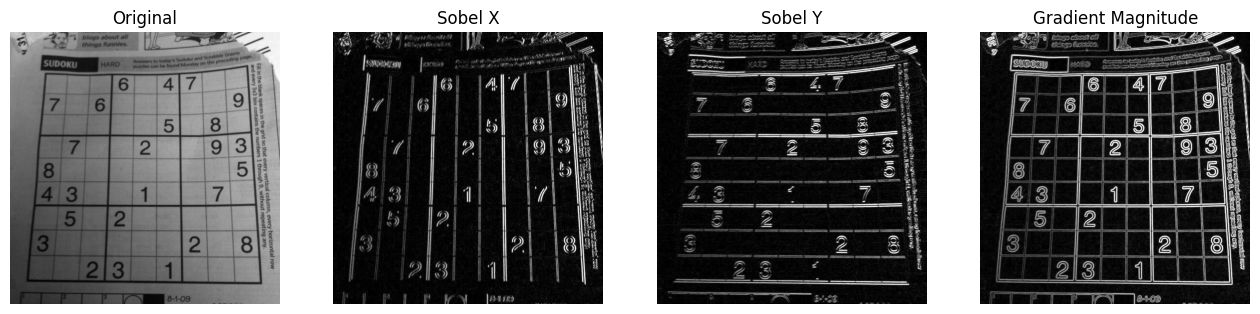

In [ ]:
sx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

sx_disp = cv2.convertScaleAbs(sx)
sy_disp = cv2.convertScaleAbs(sy)

mag = cv2.magnitude(sx, sy)
mag_disp = cv2.convertScaleAbs(mag)

plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
plt.imshow(gray, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(sx_disp, cmap="gray")
plt.title("Sobel X")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(sy_disp, cmap="gray")
plt.title("Sobel Y")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(mag_disp, cmap="gray")
plt.title("Gradient Magnitude")
plt.axis("off")
plt.show()


**cv2.Sobel()** computes image gradients: Sobel X highlights vertical edges, Sobel Y highlights horizontal edges. **cv2.CV_64F** stores results in float because gradients can be negative and larger than 255. **cv2.magnitude()** combines X and Y gradients into overall edge strength. **cv2.convertScaleAbs()** converts float gradients into viewable 8-bit images.

**Laplacian Edge detection**

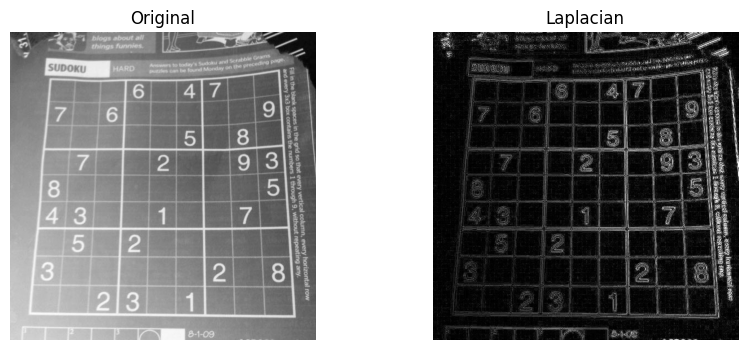

In [ ]:

lap = cv2.Laplacian(gray, cv2.CV_16S, ksize=3)
lap_disp = cv2.convertScaleAbs(lap)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap="gray")
plt.title("Original")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(lap_disp, cmap="gray")
plt.title("Laplacian")
plt.axis("off")
plt.show()


**cv2.Laplacian()** is a second-derivative edge operator; it responds strongly where intensity changes rapidly. It’s more sensitive to noise, so smoothing first often helps. **convertScaleAbs()** converts the result into a displayable image